## Predicting

**Importing librairies**


In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score

from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
import geopandas as gpd

np.random.seed(707)
import random
random.seed(707)


**Importing data**

In [20]:
filename_1 = "../data/_tarefelt1.csv"
data_1 = pd.read_csv(filename_1)
X = data_1

**Unbalanced**

In [21]:
X_sampled = X.drop(X[X['label'] == 0].sample(frac=.90).index)
X = X_sampled
X.drop(columns = "Unnamed: 0",  inplace = True)

**Plotting the predicted seaweed and comparing with naturdirektoratet**

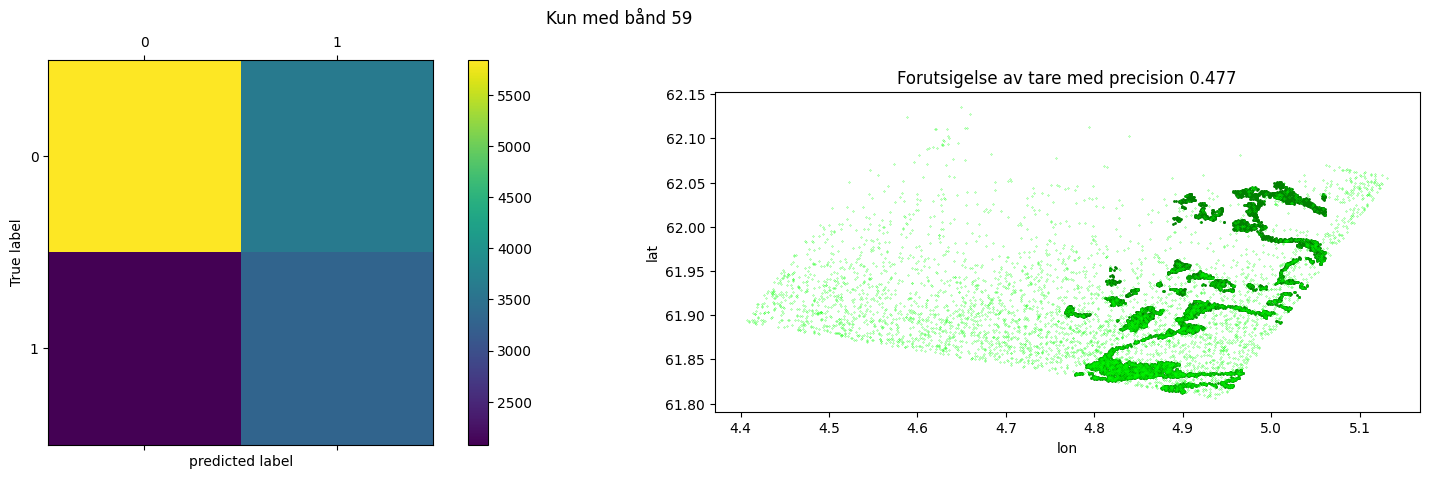

In [22]:
X_59 = X[['band_59',  'lat', 'lon','geometry', 'label']]
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for i, (train_index, test_index) in enumerate(sss.split(X_59, X_59.label)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
y_train = X_train.label
X_train.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

lat = X_test.lat
lon = X_test.lon
y_test = X_test.label
X_test.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
clf59 = make_pipeline(StandardScaler(),SGDClassifier(loss = "modified_huber",  
                    warm_start = True, 
                    penalty = "l2", 
                    n_iter_no_change= 20,
                     random_state = 42,
                    class_weight= dict(zip(np.unique(y_train), class_weights))))
clf59.fit(X_train, y_train)


y_predicted_clf59 = clf59.predict(X_test)
accuracy_clf59 = precision_score(y_test, y_predicted_clf59)
X_final = X_test.copy()
X_final["label"] = y_test
X_final["y_predicted"] = y_predicted_clf59
X_final = gpd.GeoDataFrame(X_final, geometry=gpd.points_from_xy(lon, lat))

df_no_seaweed_clf59 = X_final[X_final["y_predicted"] == 0].copy()
df_seaweed_clf59 = X_final[X_final["y_predicted"] == 1].copy()
df_true_seaweed_clf59 = X_final[X_final["label"] == True].copy()


fig, ((ax1, ax2)) = plt.subplots(1,2 ,figsize = (20,5))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_clf59)

im = ax1.matshow(conf_mat)
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted label")

df_true_seaweed_clf59.plot(ax = ax2, color = "green", label = "Tare", markersize = 1)
df_seaweed_clf59.plot(ax = ax2, color = "lime", label = "Forutsatt tare", markersize = 0.05)

ax2.set_title(f"Forutsigelse av tare med precision {np.round(accuracy_clf59,3)}")
ax2.set_xlabel("lon")
ax2.set_ylabel("lat")

fig.suptitle("Kun med bånd 59")
fig.colorbar(im)

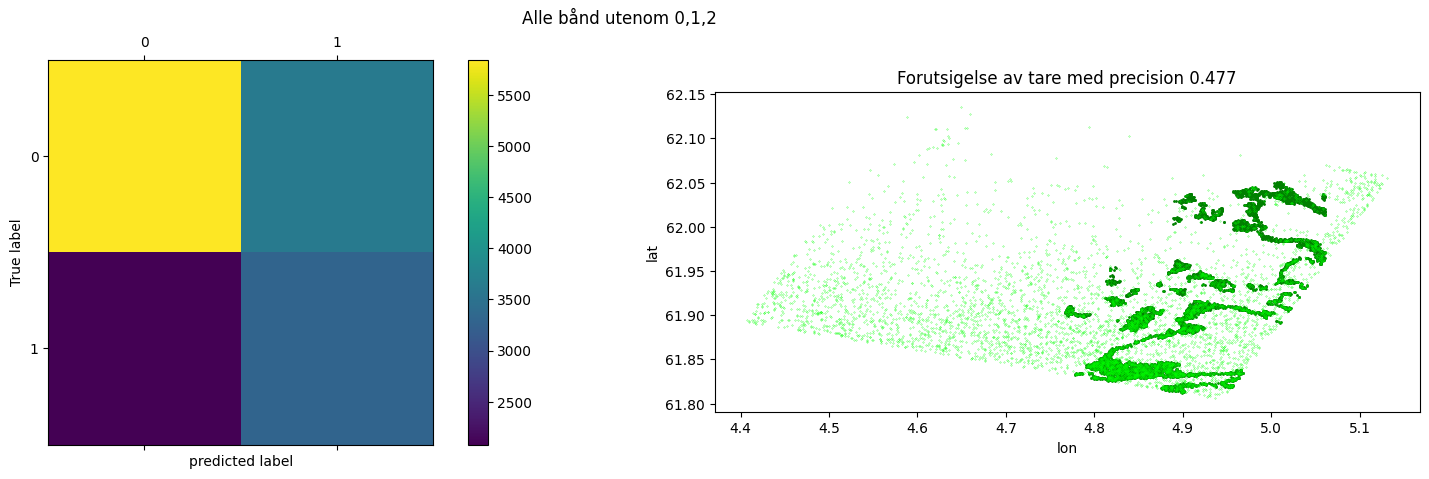

In [23]:

X_all= X[['band_3', 'band_4', 'band_5', 'band_6',
       'band_7', 'band_8', 'band_9', 'band_10', 'band_11', 'band_12',
       'band_13', 'band_14', 'band_15', 'band_16', 'band_17', 'band_18',
       'band_19', 'band_20', 'band_21', 'band_22', 'band_23', 'band_24',
       'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_30',
       'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
       'band_37', 'band_38', 'band_39', 'band_40', 'band_41', 'band_42',
       'band_43', 'band_44', 'band_45', 'band_46', 'band_47', 'band_48',
       'band_49', 'band_50', 'band_51', 'band_52', 'band_53', 'band_54',
       'band_55', 'band_56', 'band_57', 'band_58', 'band_59', 'band_60',
       'band_61', 'band_62', 'band_63', 'band_64', 'band_65', 'lat', 'lon',
       'geometry', 'label']]
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for i, (train_index, test_index) in enumerate(sss.split(X_all, X_all.label)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
y_train = X_train.label
X_train.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

lat = X_test.lat
lon = X_test.lon
y_test = X_test.label
X_test.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
clfall = make_pipeline(StandardScaler(),SGDClassifier(loss = "modified_huber",  
                    warm_start = True, 
                    penalty = "l2", 
                    n_iter_no_change= 20,
                    random_state = 42,
                    class_weight= dict(zip(np.unique(y_train), class_weights))))
clfall.fit(X_train, y_train)

y_predicted_clfall = clfall.predict(X_test)
accuracy_clfall  = precision_score(y_test, y_predicted_clfall)
X_final = X_test.copy()
X_final["label"] = y_test
X_final["y_predicted"] = y_predicted_clfall
X_final = gpd.GeoDataFrame(X_final, geometry=gpd.points_from_xy(lon, lat))

df_no_seaweed_clfall = X_final[X_final["y_predicted"] == 0].copy()
df_seaweed_clfall = X_final[X_final["y_predicted"] == 1].copy()
df_true_seaweed_clfall = X_final[X_final["label"] == True].copy()

fig, ((ax3, ax4)) = plt.subplots(1,2 ,figsize = (20,5))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted_clfall)
im = ax3.matshow(conf_mat)
ax3.set_ylabel("True label")
ax3.set_xlabel("predicted label")

df_true_seaweed_clfall.plot(ax = ax4, color = "green", label = "Tare", markersize = 1)
df_seaweed_clfall.plot(ax = ax4, color = "lime", label = "Forutsatt tare", markersize = 0.05)

ax4.set_title(f"Forutsigelse av tare med precision {np.round(accuracy_clfall,3)}")
ax4.set_xlabel("lon")
ax4.set_ylabel("lat")
fig.suptitle("Alle bånd utenom 0,1,2")
fig.colorbar(im)

Text(0.5, 0.98, 'Kun med bånd 0')

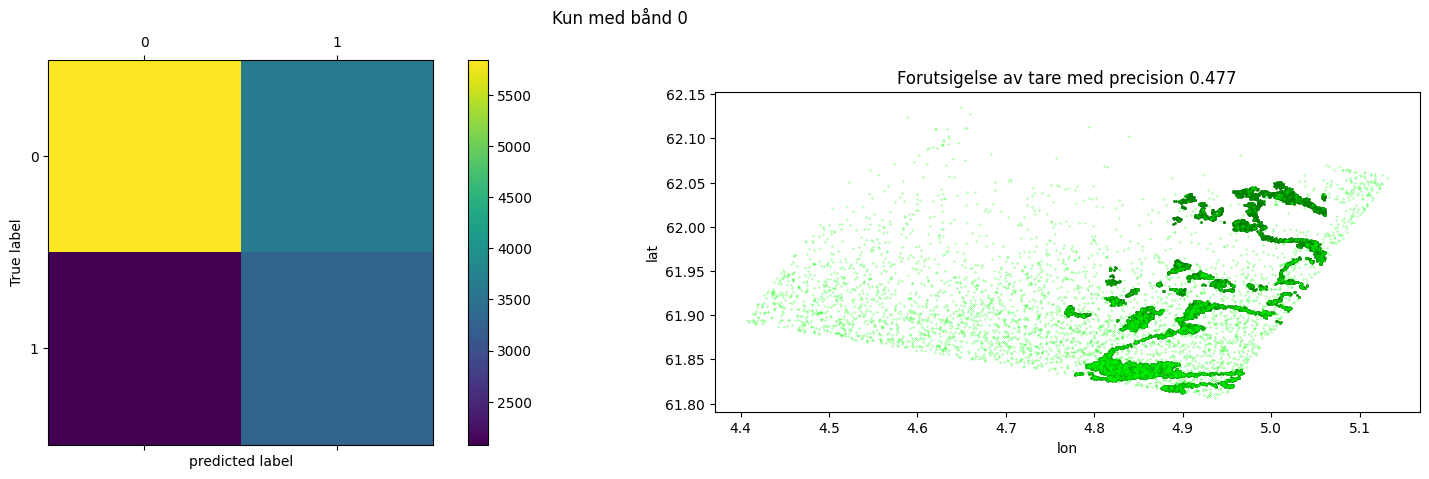

In [24]:
X_0 = X[['band_0', 'lat', 'lon',
       'geometry', 'label']]
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for i, (train_index, test_index) in enumerate(sss.split(X_0, X_0.label)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
y_train = X_train.label
X_train.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

lat = X_test.lat
lon = X_test.lon
y_test = X_test.label
X_test.drop(columns = ['lat','lon', 'geometry', 'label'], inplace = True)

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
clfnone = make_pipeline(StandardScaler(),SGDClassifier(loss = "modified_huber",  
                    warm_start = True, 
                    penalty = "l2", 
                    n_iter_no_change= 20,
                    random_state = 42,
                    class_weight= dict(zip(np.unique(y_train), class_weights))))
clfnone.fit(X_train, y_train)


y_predicted_clfnone = clfnone.predict(X_test)
accuracy_clfnone  = precision_score(y_test, y_predicted_clfnone)
X_final = X_test.copy()
X_final["label"] = y_test
X_final["y_predicted"] = y_predicted_clfnone
X_final = gpd.GeoDataFrame(X_final, geometry=gpd.points_from_xy(lon, lat))

df_no_seaweed_clfnone = X_final[X_final["y_predicted"] == 0].copy()
df_seaweed_clfnone = X_final[X_final["y_predicted"] == 1].copy()
df_true_seaweed_clfnone = X_final[X_final["label"] == True].copy()

fig, ((ax3, ax4)) = plt.subplots(1,2 ,figsize = (20,5))


conf_mat_none = confusion_matrix(y_true=y_test, y_pred=y_predicted_clfnone)
im = ax3.matshow(conf_mat_none)
ax3.set_ylabel("True label")
ax3.set_xlabel("predicted label")

df_true_seaweed_clfnone.plot(ax = ax4, color = "green", label = "Tare", markersize = 1)
df_seaweed_clfnone.plot(ax = ax4, color = "lime", label = "Forutsatt tare", markersize = 0.05)

ax4.set_title(f"Forutsigelse av tare med precision {np.round(accuracy_clfnone,3)}")
ax4.set_xlabel("lon")
ax4.set_ylabel("lat")
fig.colorbar(im)
fig.suptitle("Kun med bånd 0")